In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly


In [2]:
NMIN  = 10
NMAX  = 1000
NSTEP = 10

In [3]:
# MODE = matmul, loop1, loop2
# N    = any integer greater than 1
def stresstest(Nmin,Nmax,Ndelta):
    methods = ['loop1', 'loop2', 'matmul'] 
    # For each method
    for method in methods:
        # For various matrix dimensions
        for N in range(Nmin,Nmax,Ndelta):
            # Run the program for the given method and dimension
            #print(N)
            !echo $method $N | ./mmult
            #os.popen("echo "+method+" "+str(N)+ " | ./mmult")
            

In [4]:
# Compile the f90 file
!gfortran ./matrixmult.f90 -o mmult


In [5]:
# Erase all the records
open('loop.csv', 'w').close()
open('loop2.csv', 'w').close()
open('internal.csv', 'w').close()


In [6]:
stresstest(NMIN,NMAX,NSTEP)


In [7]:
!head -9 loop.csv


   1.0000000000000135E-005 ,          10
   7.9999999999999993E-005 ,          20
   1.5200000000000001E-004 ,          30
   3.8600000000000006E-004 ,          40
   8.2599999999999991E-004 ,          50
   1.2990000000000000E-003 ,          60
   2.1340000000000000E-003 ,          70
   2.9280000000000000E-003 ,          80
   7.8209999999999998E-003 ,          90


In [8]:
!head -9 loop2.csv


   9.9999999999999178E-006 ,          10
   5.0000000000000023E-005 ,          20
   1.5499999999999997E-004 ,          30
   3.6299999999999993E-004 ,          40
   6.9599999999999990E-004 ,          50
   1.2060000000000000E-003 ,          60
   1.9279999999999998E-003 ,          70
   2.7799999999999999E-003 ,          80
   4.0169999999999997E-003 ,          90


In [9]:
!head -9 internal.csv


   2.1000000000000077E-005 ,          10
   3.3999999999999959E-005 ,          20
   4.2000000000000045E-005 ,          30
   4.0999999999999912E-005 ,          40
   6.1999999999999989E-005 ,          50
   7.7000000000000028E-005 ,          60
   1.2299999999999995E-004 ,          70
   1.0700000000000000E-004 ,          80
   1.5400000000000006E-004 ,          90


In [10]:
# Load the data points from files
loop     = np.genfromtxt('loop.csv', delimiter=',')
loop2     = np.genfromtxt('loop2.csv', delimiter=',')
internal = np.genfromtxt('internal.csv', delimiter=',')


In [11]:
# Generic dense x vector for plotting lines
x = np.arange(loop[0,1],loop[-1,1],1)


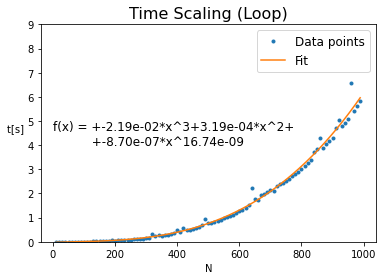

In [12]:
###########################################
#        LOOP MATRIX MULTIPLICATION       #
###########################################
plt.figure()
# Plot the scatter of timings
plt.plot(loop[:,1],loop[:,0], 'o', ms=3, label='Data points')

# Fit a polynomial
coefs = poly.polyfit(loop[:,1],loop[:,0], 3)
fit_loop = poly.polyval(x, coefs)

# This is for printing the equation
eqstr = "f(x) = "
for i in range(len(coefs)):
    if i == (len(coefs) - 1):
        eqstr += str("{:.2e}".format(coefs[i]))
    else:
        eqstr += "+"+str("{:.2e}".format(coefs[i]))+"*x^"+str(len(coefs)-1-i)
    if i == 1:
        eqstr +="+\n          "
plt.text(0, 4, eqstr, fontdict = {'fontsize' : 12})

plt.plot(x,fit_loop,label='Fit')
plt.title("Time Scaling (Loop)",fontsize=16)
plt.legend(prop={'size': 12})
plt.ylabel('t[s]     ').set_rotation(0)
plt.xlabel('N')
plt.ylim(0,9)
plt.savefig('imgs/loop.svg', format='svg')


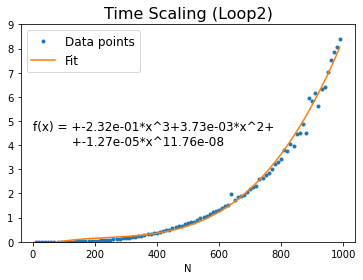

In [13]:
###########################################
#        LOOP2 MATRIX MULTIPLICATION      #
###########################################
plt.figure()
# Plot the scatter of timings
plt.plot(loop2[:,1],loop2[:,0], 'o', ms=3, label='Data points')

# Fit a polynomial
coefs2 = poly.polyfit(loop2[:,1],loop2[:,0], 3)
fit_loop2 = poly.polyval(x, coefs2)

# This is for printing the equation
eqstr = "f(x) = "
for i in range(len(coefs)):
    if i == (len(coefs) - 1):
        eqstr += str("{:.2e}".format(coefs2[i]))
    else:
        eqstr += "+"+str("{:.2e}".format(coefs2[i]))+"*x^"+str(len(coefs2)-1-i)
    if i == 1:
        eqstr +="+\n          "
plt.text(0, 4, eqstr, fontdict = {'fontsize' : 12})

plt.plot(x,fit_loop2,label='Fit')
plt.title("Time Scaling (Loop2)",fontsize=16)
plt.legend(prop={'size': 12})
plt.xlabel('N')
plt.ylim(0,9)
plt.savefig('imgs/loop2.svg', format='svg')

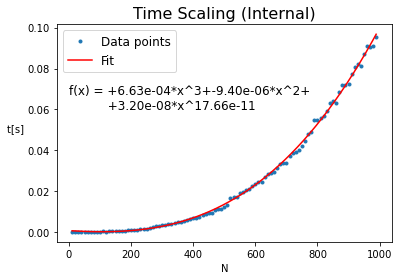

In [14]:
###########################################
#     INTERNAL MATRIX MULTIPLICATION      #
###########################################
plt.figure()
# Plot the scatter of timings
plt.plot(internal[:,1],internal[:,0], 'o', ms=3, label='Data points')

# Fit a polynomial
coefs = poly.polyfit(internal[:,1],internal[:,0], 3)
fit_int = poly.polyval(x, coefs)

# This is for printing the equation
eqstr = "f(x) = "
for i in range(len(coefs)):
    if i == (len(coefs) - 1):
        eqstr += str("{:.2e}".format(coefs[i]))
    else:
        eqstr += "+"+str("{:.2e}".format(coefs[i]))+"*x^"+str(len(coefs)-1-i)
    if i == 1:
        eqstr +="+\n          "
plt.text(0, 0.06, eqstr, fontdict = {'fontsize' : 12})

plt.plot(x,fit_int, label='Fit',color='red')
plt.title("Time Scaling (Internal)",fontsize=16)
plt.legend(prop={'size': 12})
plt.ylabel('t[s]     ').set_rotation(0)
plt.xlabel('N')
plt.savefig('imgs/internal.svg', format='svg')


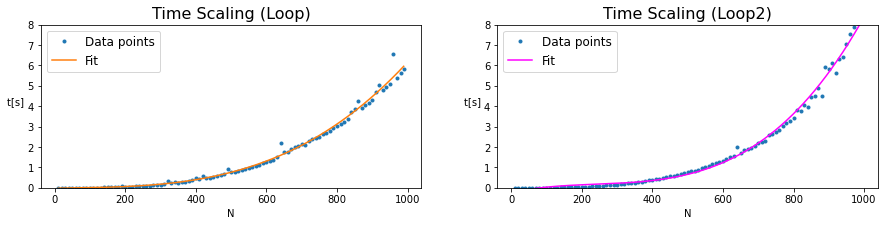

In [15]:
###################################################
#               LOOPS SIDE BY SIDE                #
###################################################

plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

plt.subplot(1, 2, 1)
# Plot the histogram of normalized spacing for random hermitian matrices
plt.plot(loop[:,1],loop[:,0], 'o', ms=3, label='Data points')
plt.plot(x,fit_loop,label='Fit')
plt.title("Time Scaling (Loop)",fontsize=16)
plt.legend(prop={'size': 12})
plt.ylabel('t[s]     ').set_rotation(0)
plt.xlabel('N')
plt.ylim(0,8)

plt.subplot(1, 2, 2)
# Plot the histogram of normalized spacing for random diagonal matrices
plt.plot(loop2[:,1],loop2[:,0], 'o', ms=3, label='Data points')
plt.plot(x,fit_loop2,label='Fit',color='magenta')
plt.title("Time Scaling (Loop2)",fontsize=16)
plt.legend(prop={'size': 12})
plt.ylabel('t[s]     ').set_rotation(0)
plt.xlabel('N')
plt.ylim(0,8)

plt.savefig('imgs/loopssidebyside.svg', format='svg')

plt.show()

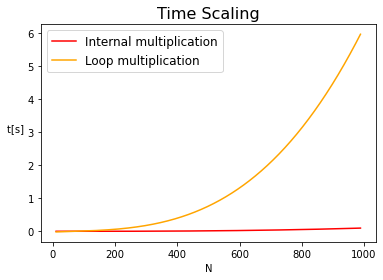

In [16]:
###########################################
#                 COMPARE                 #
###########################################
#            Internal vs Loop             #
###########################################
plt.figure()
plt.plot(x,fit_int,label='Internal multiplication',color='red')
plt.plot(x,fit_loop,label='Loop multiplication',color='orange')
plt.legend(prop={'size': 12})
plt.title("Time Scaling",fontsize=16)
plt.ylabel('t[s]     ').set_rotation(0)
plt.xlabel('N')
plt.savefig('imgs/compare.svg', format='svg')


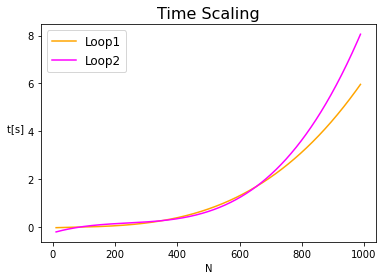

In [17]:
###########################################
#                 COMPARE                 #
###########################################
#            Loop 1 vs Loop 2             #
###########################################
plt.figure()
plt.plot(x,fit_loop,label='Loop1',color='orange')
plt.plot(x,fit_loop2,label='Loop2',color='magenta')
plt.legend(prop={'size': 12})
plt.title("Time Scaling",fontsize=16)
plt.ylabel('t[s]     ').set_rotation(0)
plt.xlabel('N')
plt.savefig('imgs/compareloops.svg', format='svg')